In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Delta 2Theta
d2th = np.loadtxt('delta2theta.txt')

In [3]:
d2th

array([0.134083, 0.231322, 0.261849, 0.407956, 0.288552, 0.771052])

In [4]:
peaks = [43.527, 50.304, 74.175, 89.853, 95.242, 116.853]
intensities = [41.935, 31.312, 24.564, 15.930, 6.324, 0.927]
indices = ['111', '200', '220', '311', '222', '400']

In [5]:
#fwhm
peaks_rad = np.deg2rad(np.array(peaks)/2)

fwhm = np.cos(peaks_rad)*d2th/0.15406
fwhm

array([0.80829457, 1.35913827, 1.35584193, 1.87484272, 1.26245093,
       2.62051534])

In [6]:
g = np.sin(np.deg2rad(np.array(peaks)/2))*2/0.15406
g

array([ 4.81340092,  5.51760504,  7.82855988,  9.16784514,  9.58980184,
       11.06022579])

In [7]:
H2 = np.array([0.333, 0.00, 0.25, 0.15702, 0.333, 0.00])

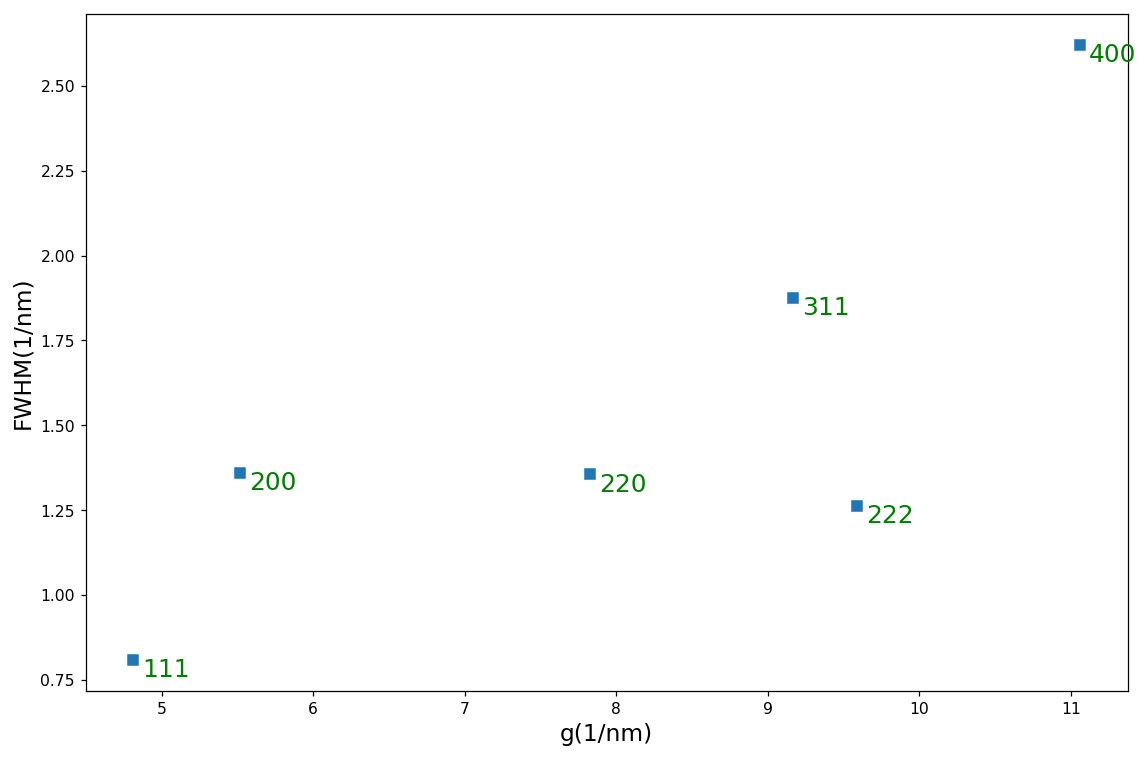

In [8]:
fig = plt.figure(figsize=(12,8), dpi=112)
ax = fig.add_subplot(111)

plt.xlabel(r'g(1/nm)', fontsize=15)
plt.ylabel(r'FWHM(1/nm)', fontsize=15)

plt.plot(g, fwhm, "s")

for k in range(len(peaks)):
  ax.text(g[k]+0.06, fwhm[k]-0.05, indices[k], color='g', fontsize=16)

plt.savefig("wh1.png")

g2c=[ 2.17501627  9.28540943  8.97839662 17.2678427   8.63331731 37.31022136]
a=-0.0009348107397261998, b=0.08877877689482637, c=0.6108032707649241
[1.33749992e-08 2.46855983e-05 1.30216741e-03]


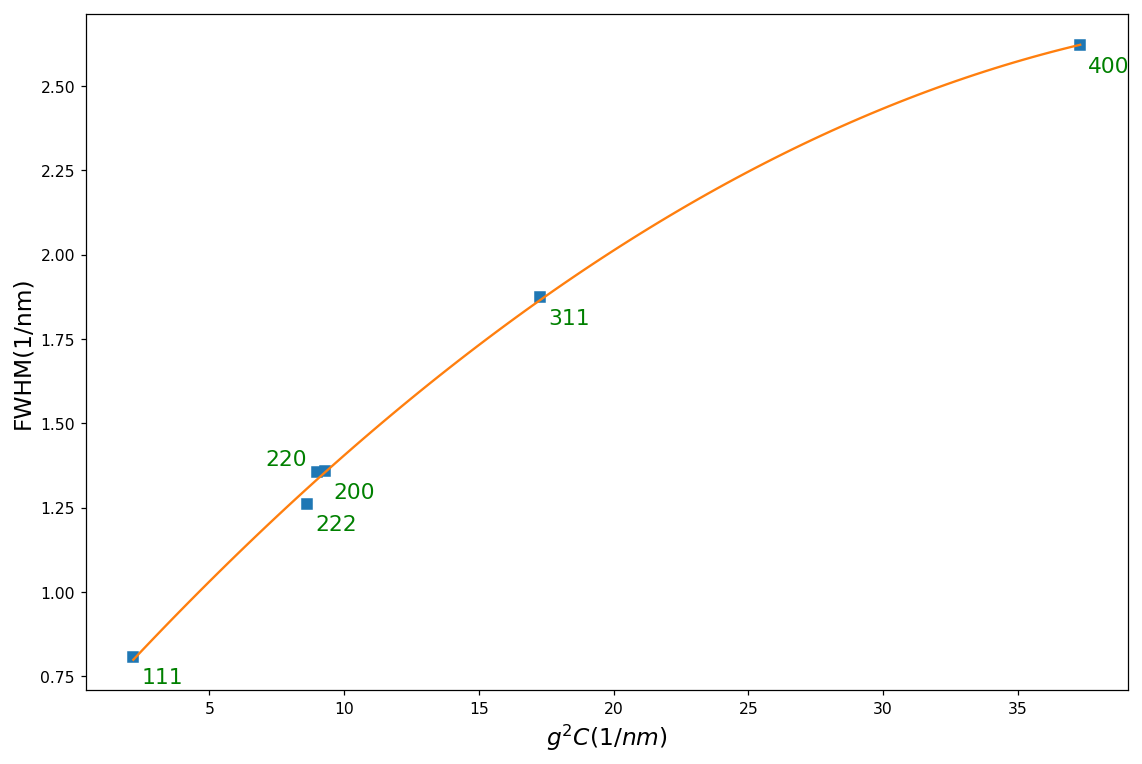

In [9]:
from scipy.optimize import curve_fit

ch00 = 0.305
q = 2.0787

C = ch00*(1-q*H2)
xnew = np.square(g)*C


def func(x, a, b, c):
  return a * np.square(x) + b*x + c

popt, pcov = curve_fit(func, xnew, fwhm)


fig = plt.figure(figsize=(12,8), dpi=112)
ax = fig.add_subplot(111)

print("g2c={0}".format(xnew))

plt.xlabel(r'$g^2C(1/nm)$', fontsize=15)
plt.ylabel(r'FWHM(1/nm)', fontsize=15)

plt.plot(xnew, fwhm, "s")
xfit = np.linspace(np.min(xnew), np.max(xnew), 100)
plt.plot(xfit, func(xfit, *popt))

_label = "a={0}, b={1}, c={2}".format(popt[0], popt[1], popt[2]) 
print(_label)
print(np.diag(pcov))

xmod = np.array([0, 0, -2.2, 0, 0, 0])
ymod = np.array([0, 0, .1, 0, 0, 0])
for k in range(len(peaks)):
  ax.text(xnew[k]+xmod[k]+0.3, fwhm[k]+ymod[k]-0.08, indices[k], color='g', fontsize=14)

plt.savefig("wh2.png")

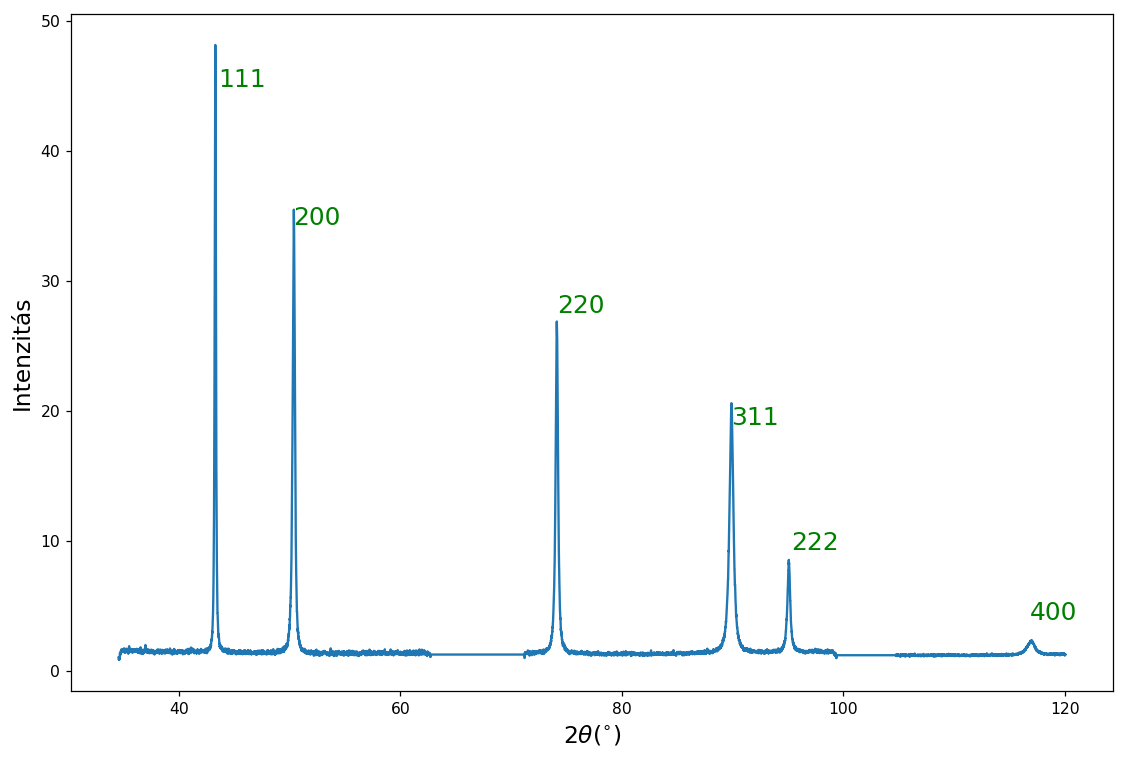

In [10]:
drkm = np.loadtxt('DRKM.dat')

fig = plt.figure(figsize=(12,8), dpi=112)
ax = fig.add_subplot(111)

plt.xlabel(r'$2\theta(^{\circ})$', fontsize=15)
plt.ylabel(r'Intenzitás', fontsize=15)

for k in range(len(peaks)):
  ax.text(peaks[k], intensities[k]+3, indices[k], color='g', fontsize=16)

plt.plot(drkm[:,0], drkm[:,1])
plt.savefig("cuspectra.png")

In [11]:
shit = np.loadtxt("DRKM.int.4.dat")
shit = pd.DataFrame(columns=['0', '1', '2', '3'], data=shit)

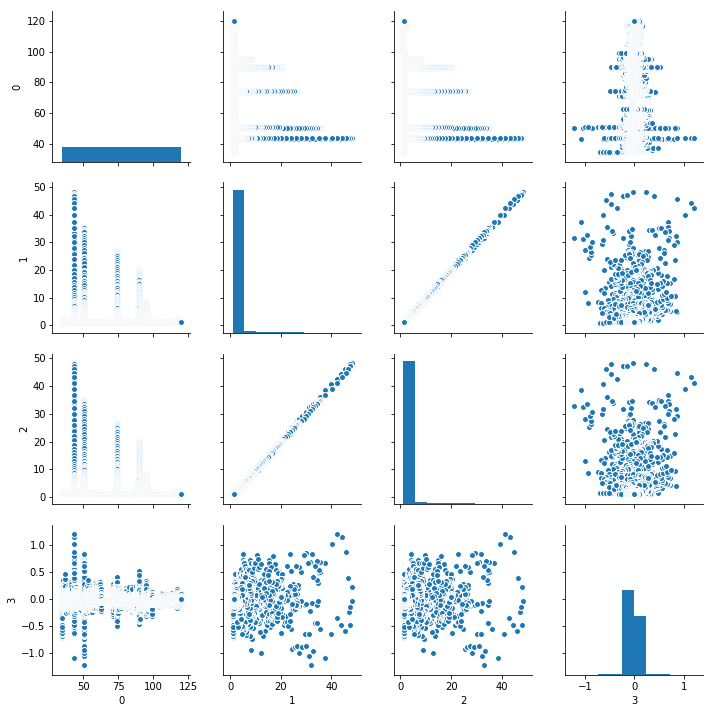

In [12]:
sns.pairplot(shit)

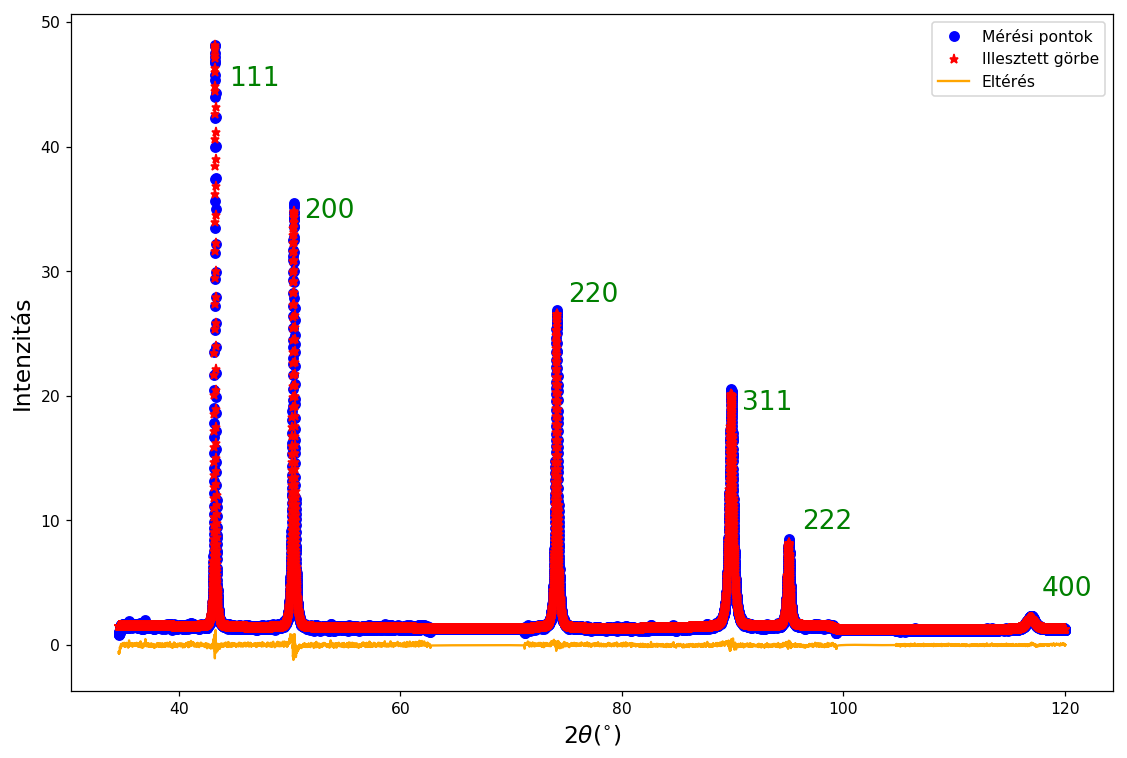

In [13]:
fig = plt.figure(figsize=(12,8), dpi=112)
ax = fig.add_subplot(111)

plt.xlabel(r'$2\theta(^{\circ})$', fontsize=15)
plt.ylabel(r'Intenzitás', fontsize=15)

for k in range(len(peaks)):
  ax.text(peaks[k]+1, intensities[k]+3, indices[k], color='g', fontsize=17)

plt.plot(shit['0'], shit['1'], "bo", label="Mérési pontok")
plt.plot(shit['0'], shit['2'], 'r*', label="Illesztett görbe")
plt.plot(shit['0'], shit['3'], color="orange", label="Eltérés")
plt.legend()

plt.savefig("cmwp.png")

In [80]:
# def lognorm(x, m, s):
#   return 1/x*1/(s*np.sqrt(np.pi*2))*np.exp(-(np.log(x/m))**2/(2*s**2))
from scipy.stats import lognorm

In [89]:
sig=0.4484
m=43.08

m*np.exp(.5*sig**2)

47.63606451740552

In [91]:
m*np.exp(3.5*sig**2)

87.07569625762905